**Nosson Weissman**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer 2022**

__DAV 6150 Practical (Module 5) : Performance Metrics__

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from statsmodels.graphics.mosaicplot import mosaic

## Intro

In this assignment we are given a dataset containing categorical data predictions. <br>
Considering only the data pertaining to the predicition-correctness, we define our own functions and compare with their respective sklearn comparable functions. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codepharmer/AI-6150/main/M5%20Performance%20Metrics/M5_Data.csv')
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


#### Quick check that no data is missing

In [3]:
df.isna().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

### As per assignment instructions, we focus on the last three columns

In [4]:
raw_data = df[[df.columns[col] for col in [8,9,10]]]
obs = raw_data['class']
pred = raw_data['scored.class']
pred_p = raw_data['scored.probability']

### We can use the pandas crosstab function to create a confusion matrix

In [6]:
#3.
pd.crosstab(raw_data['scored.class'],raw_data['class'])

class,0,1
scored.class,,
0,119,30
1,5,27


### Below we define a function which we will use as a helper within our metrics functions defined below 
The function, given binary classification data, creates a confusion matrix

In [9]:
def create_confusion_matrix(pred, obs):
    # get indices for pred value == True
    pred_true = [i for i in range(len(pred)) if pred[i] == True]
    # get indices for when pred value == False
    pred_false = [i for i in range(len(pred)) if pred[i] == False]
    # get the count of true negatives, true positives etc.
    tn = len([i for i in pred_false if obs[i] == False])
    tp = len([i for i in pred_true if obs[i] == True])
    fp = len([i for i in pred_true if obs[i] == False])
    fn = len([i for i in pred_false if obs[i] == True])
    # return confusion matrix of pred obs
    return (pd.DataFrame({'obs_0':[tn,fp],'obs_1':[fn,tp]}))

### We can also visualize our consfusion matrix using a mosaic graph

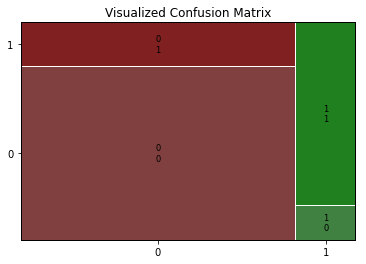

In [10]:
mosaic(create_confusion_matrix(pred, obs).values, title='Visualized Confusion Matrix')
plt.show()

### Using the pandas flatten function, we can extract the confusion matrix values

In [11]:
pd_cf = pd.crosstab(raw_data['scored.class'],raw_data['class'])
tn,fn,fp,tp =pd_cf.values.flatten()
tn,fn,fp,tp

(119, 30, 5, 27)

## Definitions of metrics:

$tp$ = true positive, $fp$ = false positive, $tn$ = true negative, $fn$ = false negative
    
    ⬇ When we want to see how much we can rely on our positive predictions to actually be correct 

**Precision** =$\Large\frac{tp}{tp+fp}$ 
    
    ⬇Used as a holisitic measurement of our prediction correcness


**Accuracy** = $\Large\frac{tp+tn}{tp+fp+tn+fn}$ 
    
    ⬇When we want to see how many of all actual positives we were able to predict

**Sensitivity** = $\Large\frac{tp}{tp+fn}$ 
    
    ⬇When we want to see how many of the negatives we were able to predict

**Specificity** = $\Large\frac{tn}{tn+fp}$  

    ⬇Combination of precision and sensitivity
**F1** = $\Large\frac{tp}{tp+0.5(fp+fn)}$ 


### In the following five cells we define functions to calculate correcness metrics for binary classification data

In [56]:
def accuracy(pred,obs):
    #accuracy = (tp+tn)/(tp+fp+tn+fn)
    # generate confusion matrix for data
    cf = create_confusion_matrix(pred, obs)
    tn,fn,fp,tp = cf.values.flatten()
    return (tp+tn)/(tp+fp+tn+fn)

In [133]:
def precision(pred,obs):
    #precision = tp / (tp+fp)
    # generate confusion matrix for data
    cf = create_confusion_matrix(pred, obs)
    # extract values from confusion matrix
    tn,fn,fp,tp = cf.values.flatten()
    return (tp/(tp+fp))

In [58]:
def sensitivity(pred,obs):
    #sensitivity = tp / (tp+fn)
    # generate confusion matrix for data
    cf = create_confusion_matrix(pred, obs)
    tn,fn,fp,tp = cf.values.flatten()
    return  tp / (tp+fn)

In [59]:
def specificity(pred,obs):
    #specificity = tn / (tn+fp)
    # generate confusion matrix for data
    cf = create_confusion_matrix(pred, obs)
    tn,fn,fp,tp = cf.values.flatten()
    return tn / (tn+fp)

In [60]:
def f1(pred,obs):
    '''f1 = tp/(tp+.5(fp+fn))'''
    '''generate confusion matrix for data'''
    cf = create_confusion_matrix(pred, obs)
    tn,fn,fp,tp = cf.values.flatten()
    return  tp/(tp+.5*(fp+fn))

### Now, using the functions defined above, and the data pulled from Github we compute each metric and print the results...

In [207]:
print('accuracy: ',accuracy(pred, obs))
print('precision: ',precision(pred, obs))
print('sensitivity: ',sensitivity(pred,obs))
print('specificity: ',specificity(pred,obs))
print('f1 score: ',f1(pred,obs))
print(metrics.classification_report(obs,pred))

accuracy:  0.8066298342541437
precision:  0.84375
sensitivity:  0.47368421052631576
specificity:  0.9596774193548387
f1 score:  0.6067415730337079
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



### We compare our functions with the sklearn built-in functions

In [89]:
display(metrics.confusion_matrix(pred,obs))
print('accuracy matches sklearn: ', metrics.accuracy_score(obs,pred) == accuracy(pred, obs))
print('precision matches sklearn: ',metrics.precision_score(obs,pred) == precision(pred,obs))
print('sensitivity matches sklearn: ',metrics.recall_score(obs,pred) == sensitivity(pred,obs))
print('f1 score matches sklearn: ',metrics.f1_score(obs,pred) == f1(pred,obs))
# metrics.classification_report(pred,obs)

array([[119,  30],
       [  5,  27]], dtype=int64)

accuracy matches sklearn:  True
precision matches sklearn:  True
sensitivity matches sklearn:  True
f1 score matches sklearn:  True


Above we can see that when comparing our home-grown functions and the sklearn built-in functionality, we achieved the same output as the sklearn funtions.

### Next we define a function to show the ROC curve and AUC

The ROC curve shows us which thresholds will yield best results whether we want a higher true positive rate or a whether we want a higher false postive rate (or something in the middle).

In [209]:
def show_roc_auc():
    roc_x, roc_y = [], []
    thresholds = np.linspace(0,1,num=10000)
    auc = 0
    for i, point in enumerate(thresholds):
        curr_pred = np.where(pred_p > point, 1, 0)
        '''fp-rate here is used as our x values 
            (in some circumstances we could use precision instead)'''
        fp_rate = 1 - specificity(curr_pred, obs)
        '''we use tp-rate as our y values'''
        tp_rate = sensitivity(curr_pred, obs)
        roc_x.append(fp_rate)
        roc_y.append(tp_rate)
        if i > 0:
            auc += (roc_x[i]-roc_x[i-1])*(roc_y[i-1]+roc_y[i])/2
    plt.title('Home Grown ROC Graph', size='14')
    plt.plot([0,1], linestyle='dashed',color='green')
    plt.plot(roc_x,roc_y,'.', color='orange')
    plt.show()
    print('AUC: ',abs(auc))

The formula for the AUC that I used is a numerical integration (can be used on non-continuous functions) based method.
The formula can be found [here](https://www.listendata.com/2014/08/learn-area-under-curve-auc.html#:~:text=AUC%20%3AArea%20under%20curve%20(AUC,0.5%20times%20of%20Tied%20Percent.)

### Below we compare our ROC/AUC function with the sklearn versions

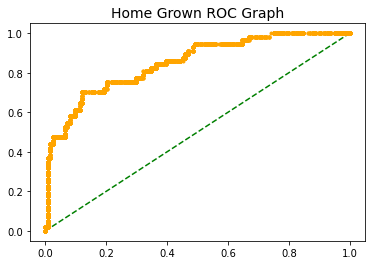

AUC:  0.850311262026033


In [210]:
show_roc_auc()

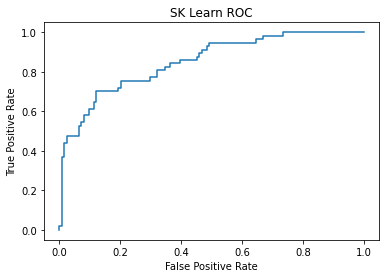

AUC:  0.8503112620260327


In [208]:
fp_rate, tp_rate, _ = metrics.roc_curve(obs,pred_p)
metrics.RocCurveDisplay(fpr = fp_rate, tpr = tp_rate).plot()
plt.title('SK Learn ROC')
plt.show()
print('AUC: ', metrics.roc_auc_score(obs, pred_p))

We can see that our AUC is pretty close to the sklearn version (although, they likley used an approach which was less computationally expensive than ours (based solely on the amount of time it took to run either one).

### Overall, it seems we were able to replicate the sklearn functionality in an accessible manor. 

# TRIPLE BAM! ✨